# BINF-F401 - Computational Methods for Functional Genomics

## Question 1. Exploration of clinical variables

### 1.1 Explore and preprocess the clinical data set

In [5]:
# Read the TSV file into a data frame
clinical_data <- read.table("clinical_data.tsv", header = TRUE, sep = "\t")

# Display the first few rows of the data frame to verify it was read correctly
head(clinical_data, 3)

,SMPLID,SUBJID,COHORT,SEX,AGE,HGHT,WGHT,BMI,SMPTHNTS,TRISCHD,DTHVNT,DTHHRDY,SMPLID.1,IMGURL
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,GTEX.111YS.0526,GTEX.111YS,Organ Donor (OPO),1,62,72,227,30.78,NO_REPORT,74,1,0,GTEX-111YS-0525,https://brd.nci.nih.gov/brd/specimen/GTEX-111YS-0526
2,GTEX.1122O.1126,GTEX.1122O,Organ Donor (OPO),2,64,66,203,32.76,NO_REPORT,35,1,0,GTEX-1122O-1125,https://brd.nci.nih.gov/brd/specimen/GTEX-1122O-1126
3,GTEX.1128S.0326,GTEX.1128S,Postmortem,2,66,66,160,25.82,NO_REPORT,816,0,2,GTEX-1128S-0325,https://brd.nci.nih.gov/brd/specimen/GTEX-1128S-0326


In [14]:
summary(clinical_data)

    SMPLID             SUBJID             COHORT               SEX       
 Length:280         Length:280         Length:280         Min.   :1.000  
 Class :character   Class :character   Class :character   1st Qu.:1.000  
 Mode  :character   Mode  :character   Mode  :character   Median :1.000  
                                                          Mean   :1.357  
                                                          3rd Qu.:2.000  
                                                          Max.   :2.000  
      AGE             HGHT            WGHT            BMI       
 Min.   :21.00   Min.   :58.00   Min.   : 92.0   Min.   :18.58  
 1st Qu.:48.00   1st Qu.:65.00   1st Qu.:155.8   1st Qu.:24.33  
 Median :56.00   Median :68.00   Median :176.4   Median :27.29  
 Mean   :53.64   Mean   :67.85   Mean   :179.7   Mean   :27.35  
 3rd Qu.:64.00   3rd Qu.:71.00   3rd Qu.:202.9   3rd Qu.:30.67  
 Max.   :70.00   Max.   :77.00   Max.   :273.8   Max.   :34.99  
   SMPTHNTS            TRIS

We need to convert the character variables into factors to use them efficiently. 

In [7]:
library(dplyr)
# Convert character columns to factors using dplyr
clinical_data <- clinical_data %>%
  mutate_if(is.character, as.factor)


Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union




The problem is that some categorical variables are still considered as double (SEX, DTHHRDY and DTHVNT)

In [8]:
# Convert SEX, DTHHRDY and DTHVNT to factors
clinical_data$SEX <- as.factor(clinical_data$SEX)
clinical_data$DTHHRDY <- as.factor(clinical_data$DTHHRDY)
clinical_data$DTHVNT <- as.factor(clinical_data$DTHVNT)

In [9]:
summary(clinical_data)

             SMPLID           SUBJID                  COHORT    SEX    
 GTEX.111YS.0526:  1   GTEX.111YS:  1   Organ Donor (OPO):143   1:180  
 GTEX.1122O.1126:  1   GTEX.1122O:  1   Postmortem       :137   2:100  
 GTEX.1128S.0326:  1   GTEX.1128S:  1                                  
 GTEX.117XS.0426:  1   GTEX.117XS:  1                                  
 GTEX.117YW.0226:  1   GTEX.117YW:  1                                  
 GTEX.11DXX.0426:  1   GTEX.11DXX:  1                                  
 (Other)        :274   (Other)   :274                                  
      AGE             HGHT            WGHT            BMI       
 Min.   :21.00   Min.   :58.00   Min.   : 92.0   Min.   :18.58  
 1st Qu.:48.00   1st Qu.:65.00   1st Qu.:155.8   1st Qu.:24.33  
 Median :56.00   Median :68.00   Median :176.4   Median :27.29  
 Mean   :53.64   Mean   :67.85   Mean   :179.7   Mean   :27.35  
 3rd Qu.:64.00   3rd Qu.:71.00   3rd Qu.:202.9   3rd Qu.:30.67  
 Max.   :70.00   Max.   :77.00   M

We can now see more clearly what each variable represents in the data set. 

Here is a brief description of what each variable represents : 

Clinical variables

- `AGE` is the age of the donor
- `SEX` is the sex of the donor
- `HGHT` is the height of the donor
- `WGHT` is the weight of the donor
- `BMI` is the Body Mass Index of the donor, which is defined as $\frac{\texttt{weight}}{\texttt{height}^2}$

Technical variables

- `COHORT` is a type of donor, there is 'Organ donor' and 'Postmortem'
- `TRISCHD` is the ischemic time (measured in minutes) and corresponds to the time elapsed bewteen the donor's death and tissue collection
- `DTHVNT` indicates whether the subject died under a ventilator or not
- `DTHHRDY` is the Hardy scale. It is a number between $0$ and $4$ summarizing the circumstances of death
  
  * $0=$ death under ventilator
  * $1=$ violent and rapid death
  * $2=$ rapid death due to natural causes
  * $3=$ intermediate death
  * $4=$ slow death
 
Miscalleneous

- `SUBJID` is the GTEx ID of the subject
- `SMPLID` is the GTEx ID of the organ
- `SMPLID.1` is another ID for the sample
- `SMPTHNTS` is a field indicating the sample's pathology notes taken by the pathologists who examined the histological slice
- `IMGURL` is a link to the interactively zoomable high resolution scan of the histological slice

In our analyses we will discard all the miscalleneous variables except the `SMPLID` which will serve as names for the rows or columns of matrices of clinical variables. The reason for this is that `SUBJID` only identifies the subject and offers no relevant information, `SMPLID.1` is just another identifier for the samples, but `SMPLID` already serves this purpose, `SMPTHNTS` contains no information at all, as we can see by executing the following command

In [10]:
any(clinical_data$SMPTHNTS!='NO_REPORT')

[1] FALSE

In [29]:
# Remove the SMPTHNTS column
clinical_data$SMPTHNTS <- NULL

and finally `IMGURL` cannot be processed as it is a link to an interactive webpage and not an entity that can be manipulated by the `R` programming language in any meaningful way for our purposes. The relevant information contained in the scans of the histological slices is in fact encoded, in a manner which is amenable to analysis with the tools provided by `R`, in the morphological counts matrix we have been given.

In addition to the miscalleneous variables, we can suspect that the `DTHVNT` variable is redundant since death under ventilator is a category of the Hardy scale. Let's investigate whether we ought to keep the variable or not. Formally, we can check if there is a one-to-one correspondance between the subjects who died under a ventilator according to `DTHVNT` and those whose circumstances of death were registered on the $0$ level of the Hardy scale.

In [11]:
#Check whether DTHVNT==1 => DTHHRDY==0
!any(clinical_data$DTHVNT==1&clinical_data$DTHHRDY!=0)
#Check whether DTHHRDY==0 => DTHVNT==1
!any(clinical_data$DTHVNT!=1&clinical_data$DTHHRDY==0)

[1] FALSE

[1] TRUE

As we can see, although all subjects who were recorded as dying under a ventilator according to the Hardy scale were also recorded as such under `DTHVNH` (so at least the data is consistent in that regard), not all subjects who did in fact die under a ventilator were grouped into the $0$ level of the Hardy scale. Premusably this is because some had circumstances surrounding their death which required grouping them under another level of the scale (e.g. a slow death). Nevertheless we can still check if there is still an almost one-to-one correspondance between the categories `DTHVNT==1` and `DTHHRDY==0`. The way to do this is by drawing a barplot of the relationship between the two categorical variables.

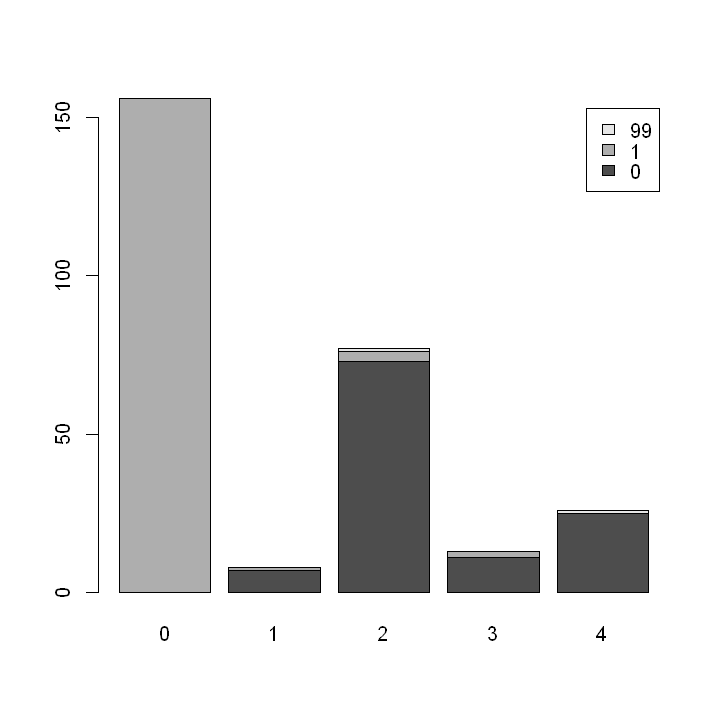

In [26]:
options(repr.plot.width=6, repr.plot.height=6)
barplot(table(clinical_data$DTHVNT, clinical_data$DTHHRDY),legend.text=TRUE)

We can clearly see that this is indeed the case. Therefore, we can consider the `DTHVNT` variable as largely redundant and discard it from our analysis for the remainder of this project.

In [12]:
# Remove the DTHVNT column
clinical_data$DTHVNT <- NULL

### 1.2 How are clinical variables distributed ?

In order to have a visual representation of the distributions of the clinical variables, we now plot histograms and barplots for all the variables we have determined to be relevant.

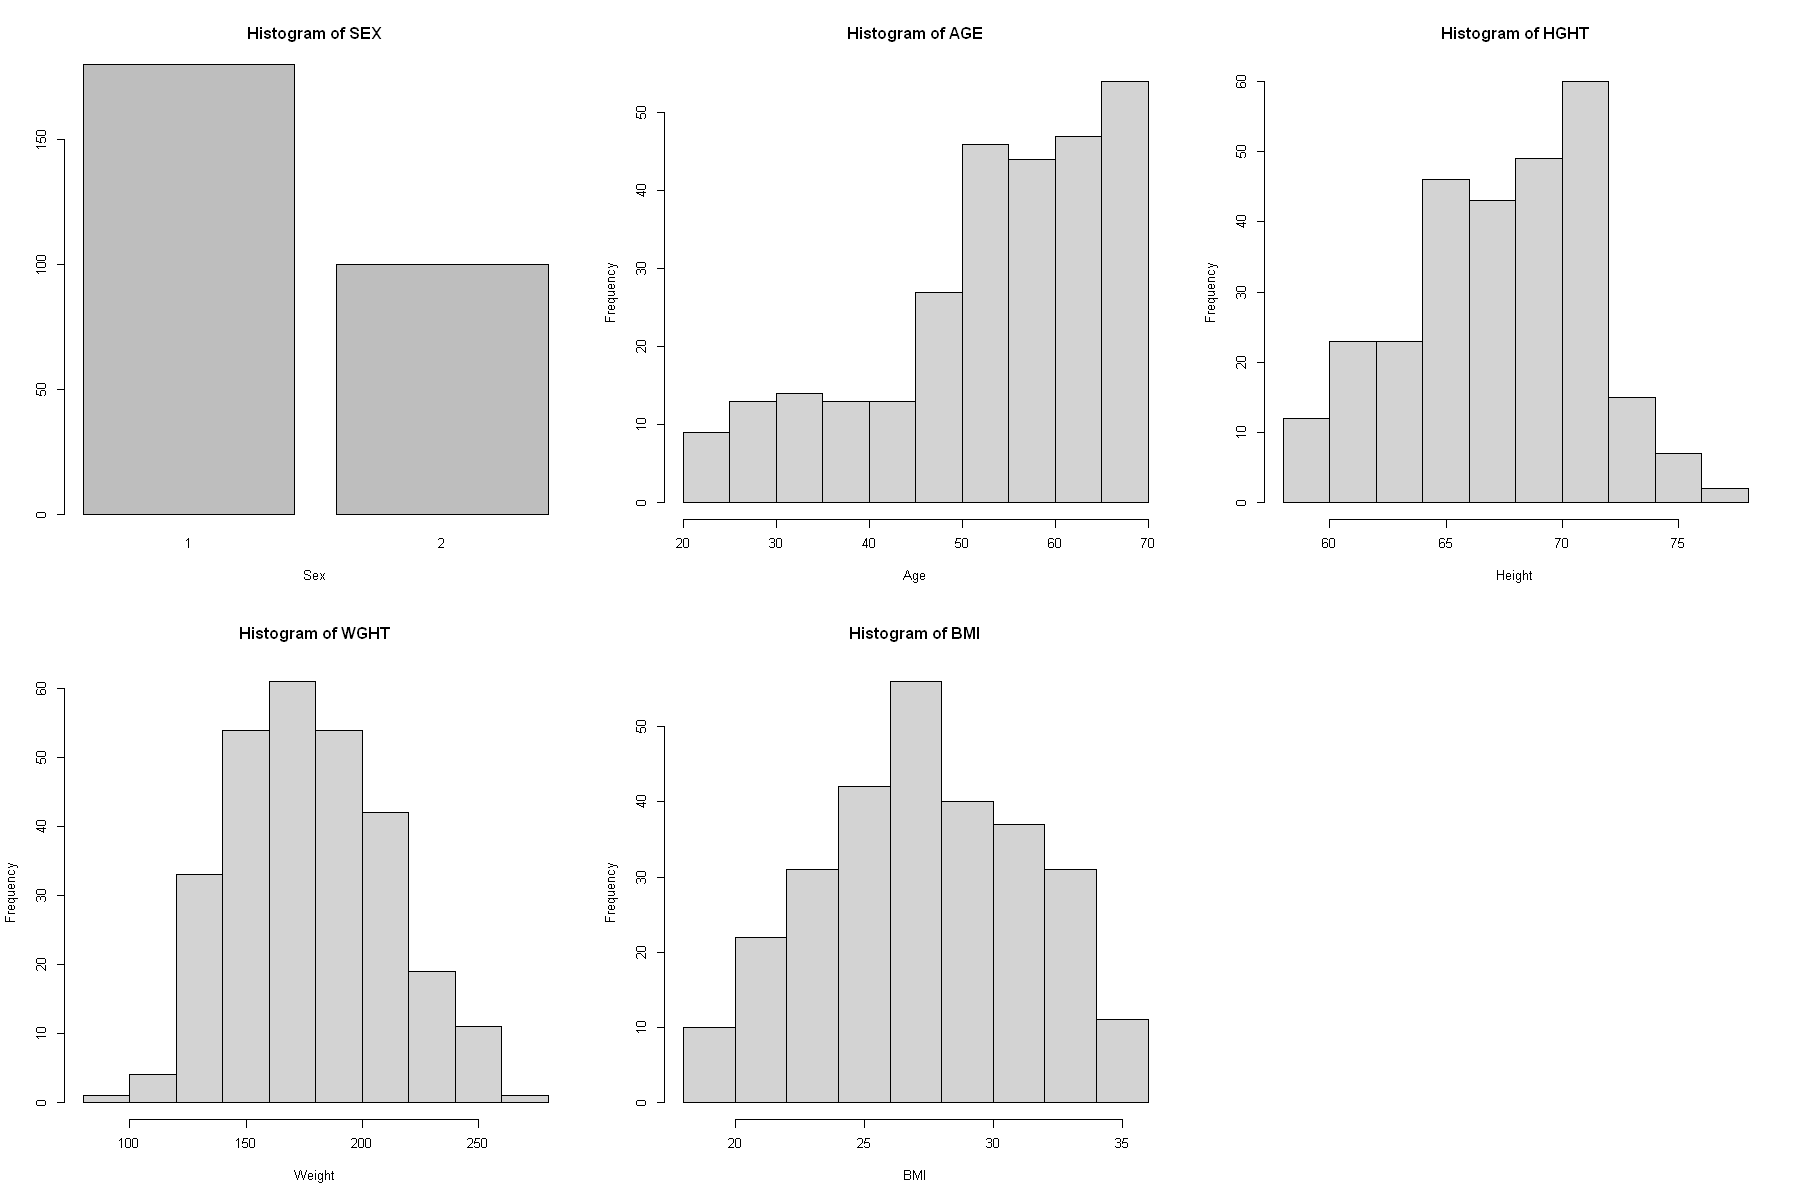

In [13]:
par(mfrow = c(2, 3)) 
options(repr.plot.width=15, repr.plot.height=10)

# Clinical variables
barplot(table(clinical_data$SEX), main="Histogram of SEX", xlab="Sex")
hist(clinical_data$AGE, main="Histogram of AGE", xlab="Age")
hist(clinical_data$HGHT, main="Histogram of HGHT", xlab="Height")
hist(clinical_data$WGHT, main="Histogram of WGHT", xlab="Weight")
hist(clinical_data$BMI, main="Histogram of BMI", xlab="BMI")

Clinical variables 
- Distribution of `SEX` : We have 180 males (1) and 100 females (2) in our dataset of 280 samples which is almost twice more males than females.
- Distribution of `AGE`: We have a bigger proportion of old patients than younger ones as discussed during the presentation of the project.
- Distribution of `HGHT`, `WGHT`, `BMI` : The distribution of these 3 variables is not completly normal because we have 180 men and 100 women in the dataset which shifts the distribution to the right as men are in average taller and heavier than women.   

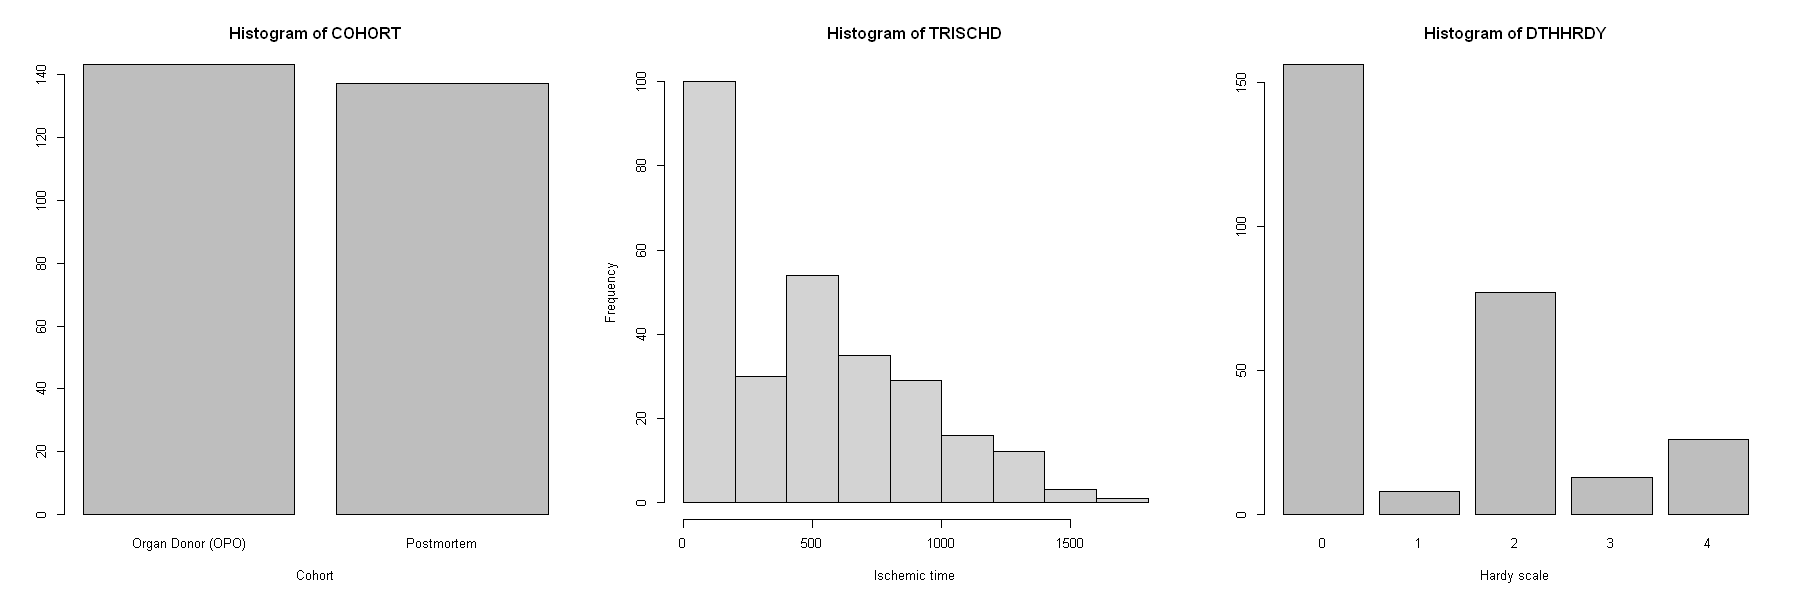

In [14]:
par(mfrow = c(1, 3)) 
options(repr.plot.width=15, repr.plot.height=5)
# Technical variables
barplot(table(clinical_data$COHORT), main="Histogram of COHORT", xlab="Cohort")
hist(clinical_data$TRISCHD, main="Histogram of TRISCHD", xlab="Ischemic time")
barplot(table(clinical_data$DTHHRDY), main="Histogram of DTHHRDY", xlab = "Hardy scale")

Technical variables
- Distribution of `COHORT` : We almost have an equal repartition of Organ donor (OPO) and Post mortem patients.
- Distribution of `TRISCHD` : We can see that we have a large number of people with very small ischemic time and the frequency is more disparate for the other windows of values. We can explain that by looking at the variable COHORT (graph below). As said juste above, we have a quite equal repartition of organ donor and post mortem patients (143 vs 137). The 143 organ donors have the propensity to have lower ischemic time which leads to a large proportion of people with very small ischemic time. In contrast, the ischemic time of post portem patients will be more disparate and spread out across a larger window of ischemic time values.
- Distribution of `DTHHRDY` : The highest circumstances frequency of death is from ventilator case (156) followed by fast death of natural causes (77), then by slow death (26), then by intermediate death (13) and finally by violent and fast death (8)

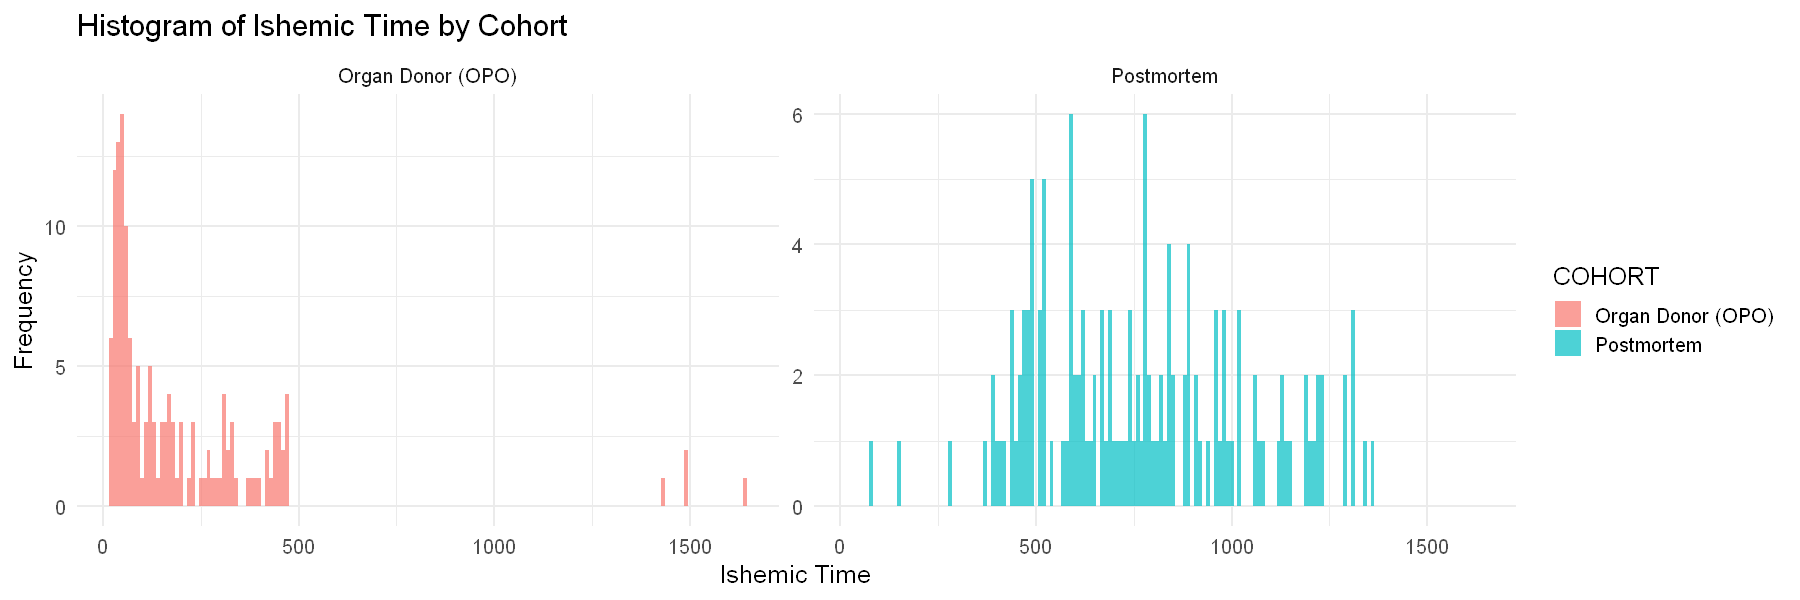

In [63]:
library(ggplot2)
ggplot(clinical_data, aes(x = TRISCHD, fill = COHORT)) +
  geom_histogram(binwidth = 10, alpha = 0.7, position = "identity") +
  facet_wrap(~ COHORT, scales = "free_y") +
  labs(title = "Histogram of Ishemic Time by Cohort",
       x = "Ishemic Time",
       y = "Frequency") +
  theme_minimal(base_size = 15)

## 1.3 How are clinical variables correlated ?

Now we will explore the pairwise relationships between each variable. Since there are $8$ variables, this means there are $\binom{8}{2}=28$ binary relationships to explore. This a lot so we will try to groups the plots together.

### 1.3.1 Correlations between numerical variables

We can start by exploring the correlation between the 5 numerical variables. 

,AGE,HGHT,WGHT,BMI,TRISCHD
AGE,1.00000000,0.064089264,0.0973484,0.071131909,0.22927245
HGHT,0.06408926,1.000000000,0.6121418,-0.006819023,0.14390524
WGHT,0.09734840,0.612141786,1.0000000,0.780945124,0.11913930
BMI,0.07113191,-0.006819023,0.7809451,1.000000000,0.03324977
TRISCHD,0.22927245,0.143905243,0.1191393,0.033249770,1.00000000


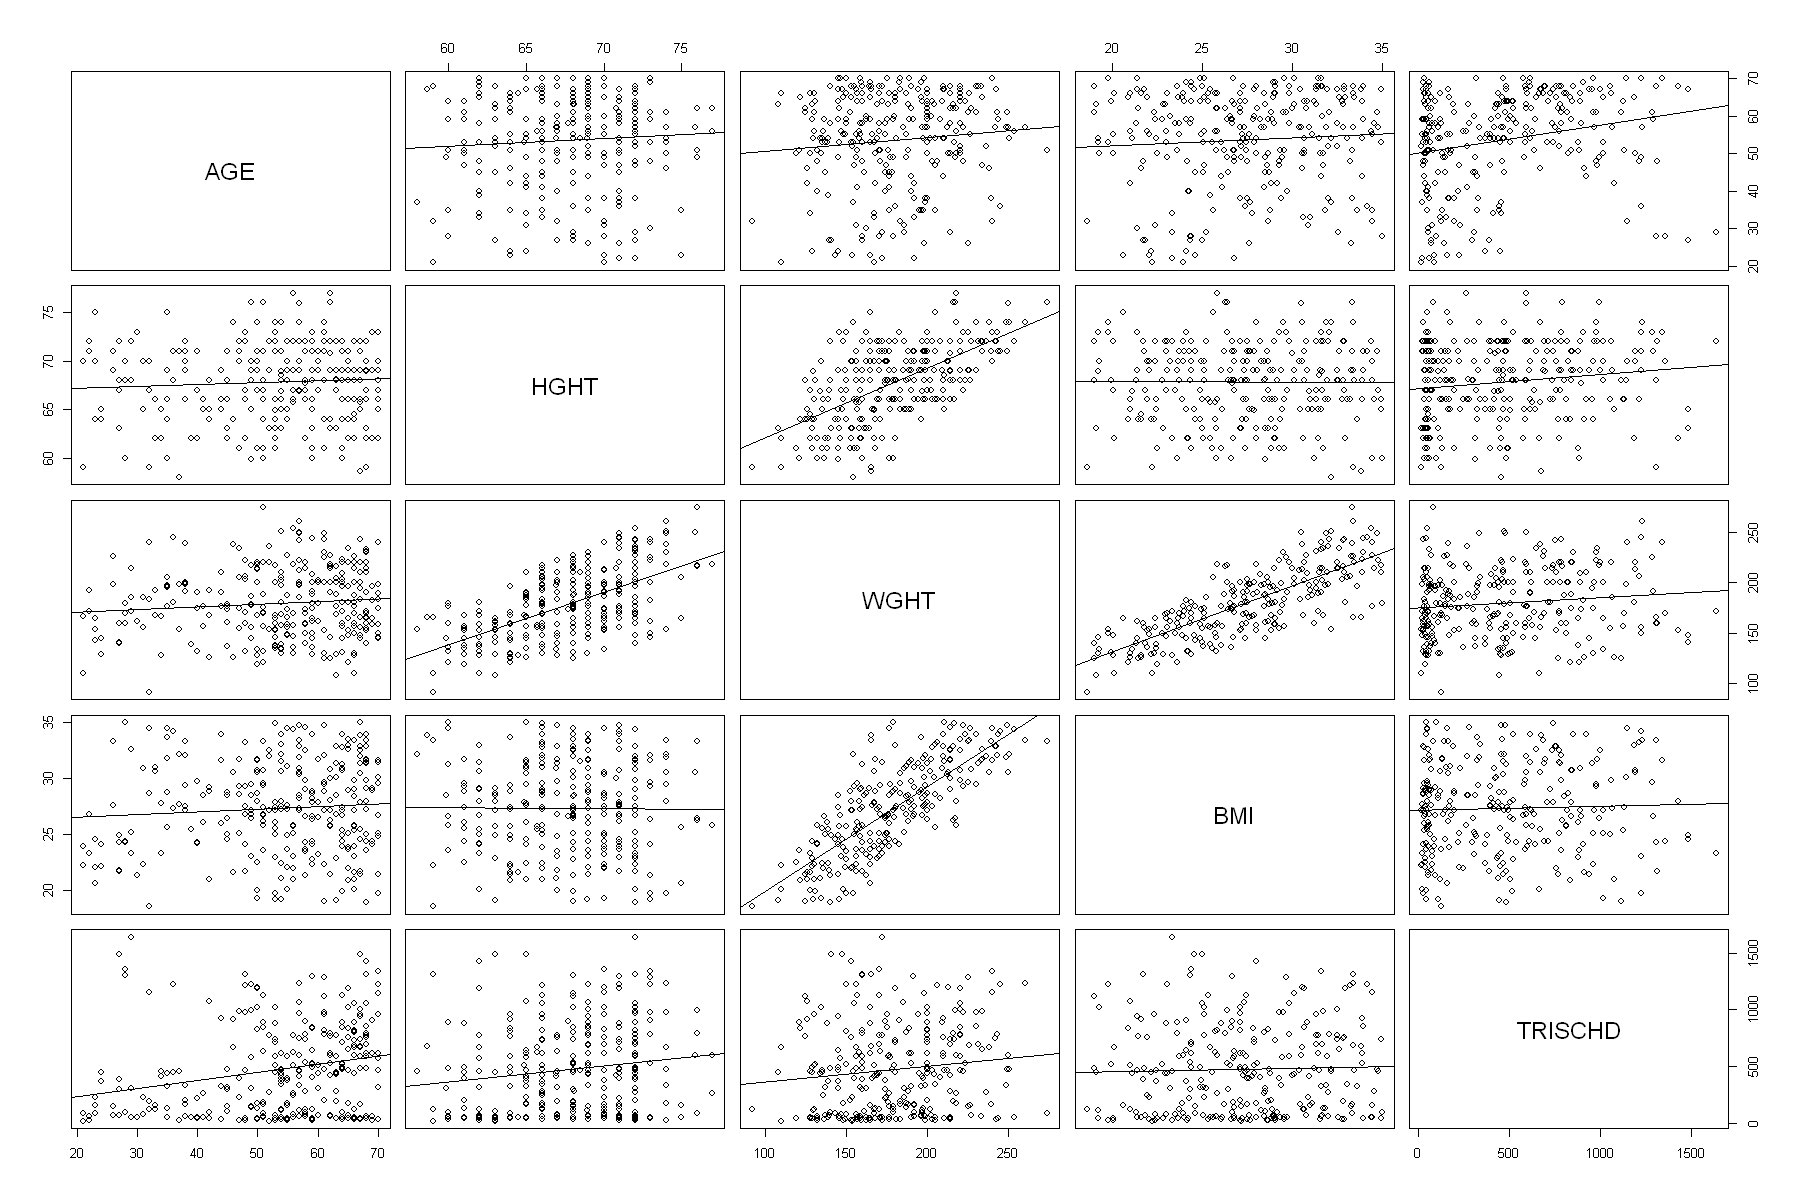

In [32]:
options(repr.plot.width=15, repr.plot.height=10)
# Pearson correlation between numerical variables
cor(clinical_data[c(5:9)])
pairs(~ AGE + HGHT + WGHT + BMI + TRISCHD, data=clinical_data, panel=function(x,y){
  points(x,y)
  linear_regression = lm(y~x)
  linear_regression_line = abline(linear_regression)
})

- `AGE` is a little bit positively correlated to `TRISCHD`.
- `HGHT` is highly positively correlated to `WGHT` which was expected as taller people have a higher tendency to be heavier. `HGHT` is also a bit positively correlated to `TRISCHD`.
- `WGHT` is highly positively correlated to `HGHT` (expected as `HGHT` is highly correlated to `WGHT`) and to `BMI` which is expected as heavier people tend to have a higher `BMI`. `WGHT` is also a little bit positively correlated to `TRISCHD`.
- `BMI` is highly positively correlated to `WGHT` but not at all to `TRISCHD`.
- As said above, `TRISCHD` is a little bit positively correlated to `AGE`, `HGHT` and `WGHT`. It suggests that older, taller and heavier people will tend to have an ischemic time a little bit higher than normal.

### 1.3.2 Correlations between numerical and categorical variables

We want to see if the value of the numerical variables depends somehow on the levels of the categorical variables.

As a reminder, the 5 numerical variables are `AGE`, `HGHT`, `WGHT`, `BMI` and `TRISCHD` and the 3 categorical variables are `SEX`, `COHORT`, `DTHHRDY`.

We used the non parametric Kruskal-Wallis test to assess the "correlation" between the numerical variables and categorical variables. We did not used ANOVA for this purpose because ANOVA requires some conditions of applications (homoscedasticity and normality of the residues) that were not respected. Indeed, the Shapiro-Wilk test, that assesses the normality of the residuals, always returned a pvalue below the alpha treshold of 5% which indicates to reject the null hypothesis of normality. 

#### 1.3.2.1 AGE

Let's start by the `AGE` variable in function of the 3 categorical variables. 

In [34]:
kruskal.test(AGE ~ SEX, data=clinical_data)
kruskal.test(AGE ~ COHORT, data=clinical_data)
kruskal.test(AGE ~ DTHHRDY, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  AGE by SEX
Kruskal-Wallis chi-squared = 1.9821, df = 1, p-value = 0.1592



	Kruskal-Wallis rank sum test

data:  AGE by COHORT
Kruskal-Wallis chi-squared = 42.838, df = 1, p-value = 5.947e-11



	Kruskal-Wallis rank sum test

data:  AGE by DTHHRDY
Kruskal-Wallis chi-squared = 53.759, df = 4, p-value = 5.912e-11


for the test `AGE` by `SEX`, the pvalue of the Kruskal-Wallis test is 0.159  which is under the treshold of alpha = 5%. It means that `AGE` is not significantly different between the two sexes. The thinking process is the same for the other tests. It means that `AGE` is significantly different between the two cohorts and between the categories of the hardy scale. 

We can visualize these differences using boxplots. 

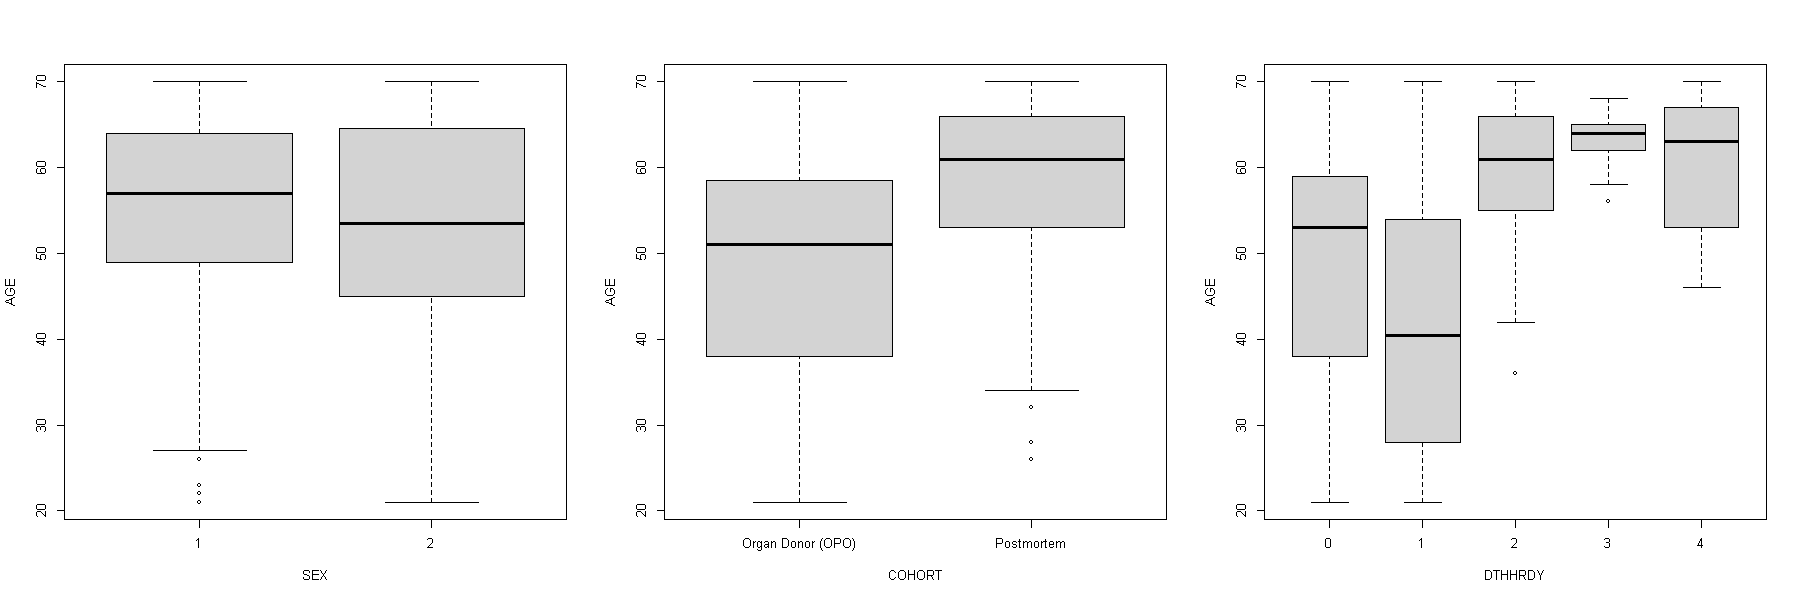

In [42]:
par(mfrow = c(1, 3))
boxplot(AGE ~ SEX, data=clinical_data)
boxplot(AGE ~ COHORT, data=clinical_data)
boxplot(AGE ~ DTHHRDY, data=clinical_data)

#### 1.3.2.2 HGHT

In [40]:
kruskal.test(HGHT ~ SEX, data=clinical_data)
kruskal.test(HGHT ~ COHORT, data=clinical_data)
kruskal.test(HGHT ~ DTHHRDY, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  HGHT by SEX
Kruskal-Wallis chi-squared = 147.65, df = 1, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  HGHT by COHORT
Kruskal-Wallis chi-squared = 4.7196, df = 1, p-value = 0.02982



	Kruskal-Wallis rank sum test

data:  HGHT by DTHHRDY
Kruskal-Wallis chi-squared = 12.113, df = 4, p-value = 0.01653


`HGHT` is significantly different between sexes, cohort and hardy scales. 

#### 1.3.2.3 WGHT

In [44]:
kruskal.test(WGHT ~ SEX, data=clinical_data)
kruskal.test(WGHT ~ COHORT, data=clinical_data)
kruskal.test(WGHT ~ DTHHRDY, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  WGHT by SEX
Kruskal-Wallis chi-squared = 65.369, df = 1, p-value = 6.21e-16



	Kruskal-Wallis rank sum test

data:  WGHT by COHORT
Kruskal-Wallis chi-squared = 4.1733, df = 1, p-value = 0.04107



	Kruskal-Wallis rank sum test

data:  WGHT by DTHHRDY
Kruskal-Wallis chi-squared = 6.6293, df = 4, p-value = 0.1568


`WGHT` is significantly different between sexes and cohort but not between hardy scales. 

#### 1.3.2.4 BMI

In [46]:
kruskal.test(BMI ~ SEX, data=clinical_data)
kruskal.test(BMI ~ COHORT, data=clinical_data)
kruskal.test(BMI ~ DTHHRDY, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  BMI by SEX
Kruskal-Wallis chi-squared = 1.089, df = 1, p-value = 0.2967



	Kruskal-Wallis rank sum test

data:  BMI by COHORT
Kruskal-Wallis chi-squared = 0.30004, df = 1, p-value = 0.5839



	Kruskal-Wallis rank sum test

data:  BMI by DTHHRDY
Kruskal-Wallis chi-squared = 0.085412, df = 4, p-value = 0.9991


`BMI` is not significantly different between sexes, cohorts and hardy scales.

#### 1.3.2.5 TRISCHD

In [49]:
kruskal.test(TRISCHD ~ SEX, data=clinical_data)
kruskal.test(TRISCHD ~ COHORT, data=clinical_data)
kruskal.test(TRISCHD ~ DTHHRDY, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  TRISCHD by SEX
Kruskal-Wallis chi-squared = 2.5489, df = 1, p-value = 0.1104



	Kruskal-Wallis rank sum test

data:  TRISCHD by COHORT
Kruskal-Wallis chi-squared = 173.68, df = 1, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  TRISCHD by DTHHRDY
Kruskal-Wallis chi-squared = 176.5, df = 4, p-value < 2.2e-16


`TRISCHD` is significantly different between cohorts and hardy scales but not between the two sex. 

## 1.3.3 Correlations between categorical variables

The 3 categorical variables are `SEX`, `COHORT` and `DTHHRDY`.

To evaluate whether the categorical variables are independant of each other, we run a Pearson's chi-squared test and Fisher's exact test for all pairs of categorical variables i.e to conclude if they are "correlated" to each other. They are 2 + 1 = 3 possible combinations to compare the categorical variables.

In [54]:
chisq.test(clinical_data$COHORT, clinical_data$SEX)
chisq.test(clinical_data$COHORT, clinical_data$DTHHRDY)
chisq.test(clinical_data$SEX, clinical_data$DTHHRDY)


	Pearson's Chi-squared test with Yates' continuity correction

data:  clinical_data$COHORT and clinical_data$SEX
X-squared = 0.73176, df = 1, p-value = 0.3923


Warning message in chisq.test(clinical_data$COHORT, clinical_data$DTHHRDY):
"L’approximation du Chi-2 est peut-être incorrecte"



	Pearson's Chi-squared test

data:  clinical_data$COHORT and clinical_data$DTHHRDY
X-squared = 225.5, df = 4, p-value < 2.2e-16


Warning message in chisq.test(clinical_data$SEX, clinical_data$DTHHRDY):
"L’approximation du Chi-2 est peut-être incorrecte"



	Pearson's Chi-squared test

data:  clinical_data$SEX and clinical_data$DTHHRDY
X-squared = 13.111, df = 4, p-value = 0.01075


In [55]:
fisher.test(clinical_data$COHORT, clinical_data$SEX)
fisher.test(clinical_data$COHORT, clinical_data$DTHHRDY)
fisher.test(clinical_data$SEX, clinical_data$DTHHRDY)


	Fisher's Exact Test for Count Data

data:  clinical_data$COHORT and clinical_data$SEX
p-value = 0.3827
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.4647701 1.3157458
sample estimates:
odds ratio 
 0.7833011 



	Fisher's Exact Test for Count Data

data:  clinical_data$COHORT and clinical_data$DTHHRDY
p-value < 2.2e-16
alternative hypothesis: two.sided



	Fisher's Exact Test for Count Data

data:  clinical_data$SEX and clinical_data$DTHHRDY
p-value = 0.008351
alternative hypothesis: two.sided


The two tests agree on concluding that the variables `COHORT` and `SEX` are independant while `COHORT` and `DTHHRDY` are not, as well as `SEX` and `DTHHRDY`.

## 1.4 Are there technical variables cofounding demographic/health variables ?

We need to see if the 5 clinical variables `AGE`, `SEX`, `HGHT`, `WGHT` and `BMI` are cofounded by the 3 technical variables `COHORT`, `TRISCHD` and `DTHHRDY` to normalize the further statistical analysis of the clinical variables. 

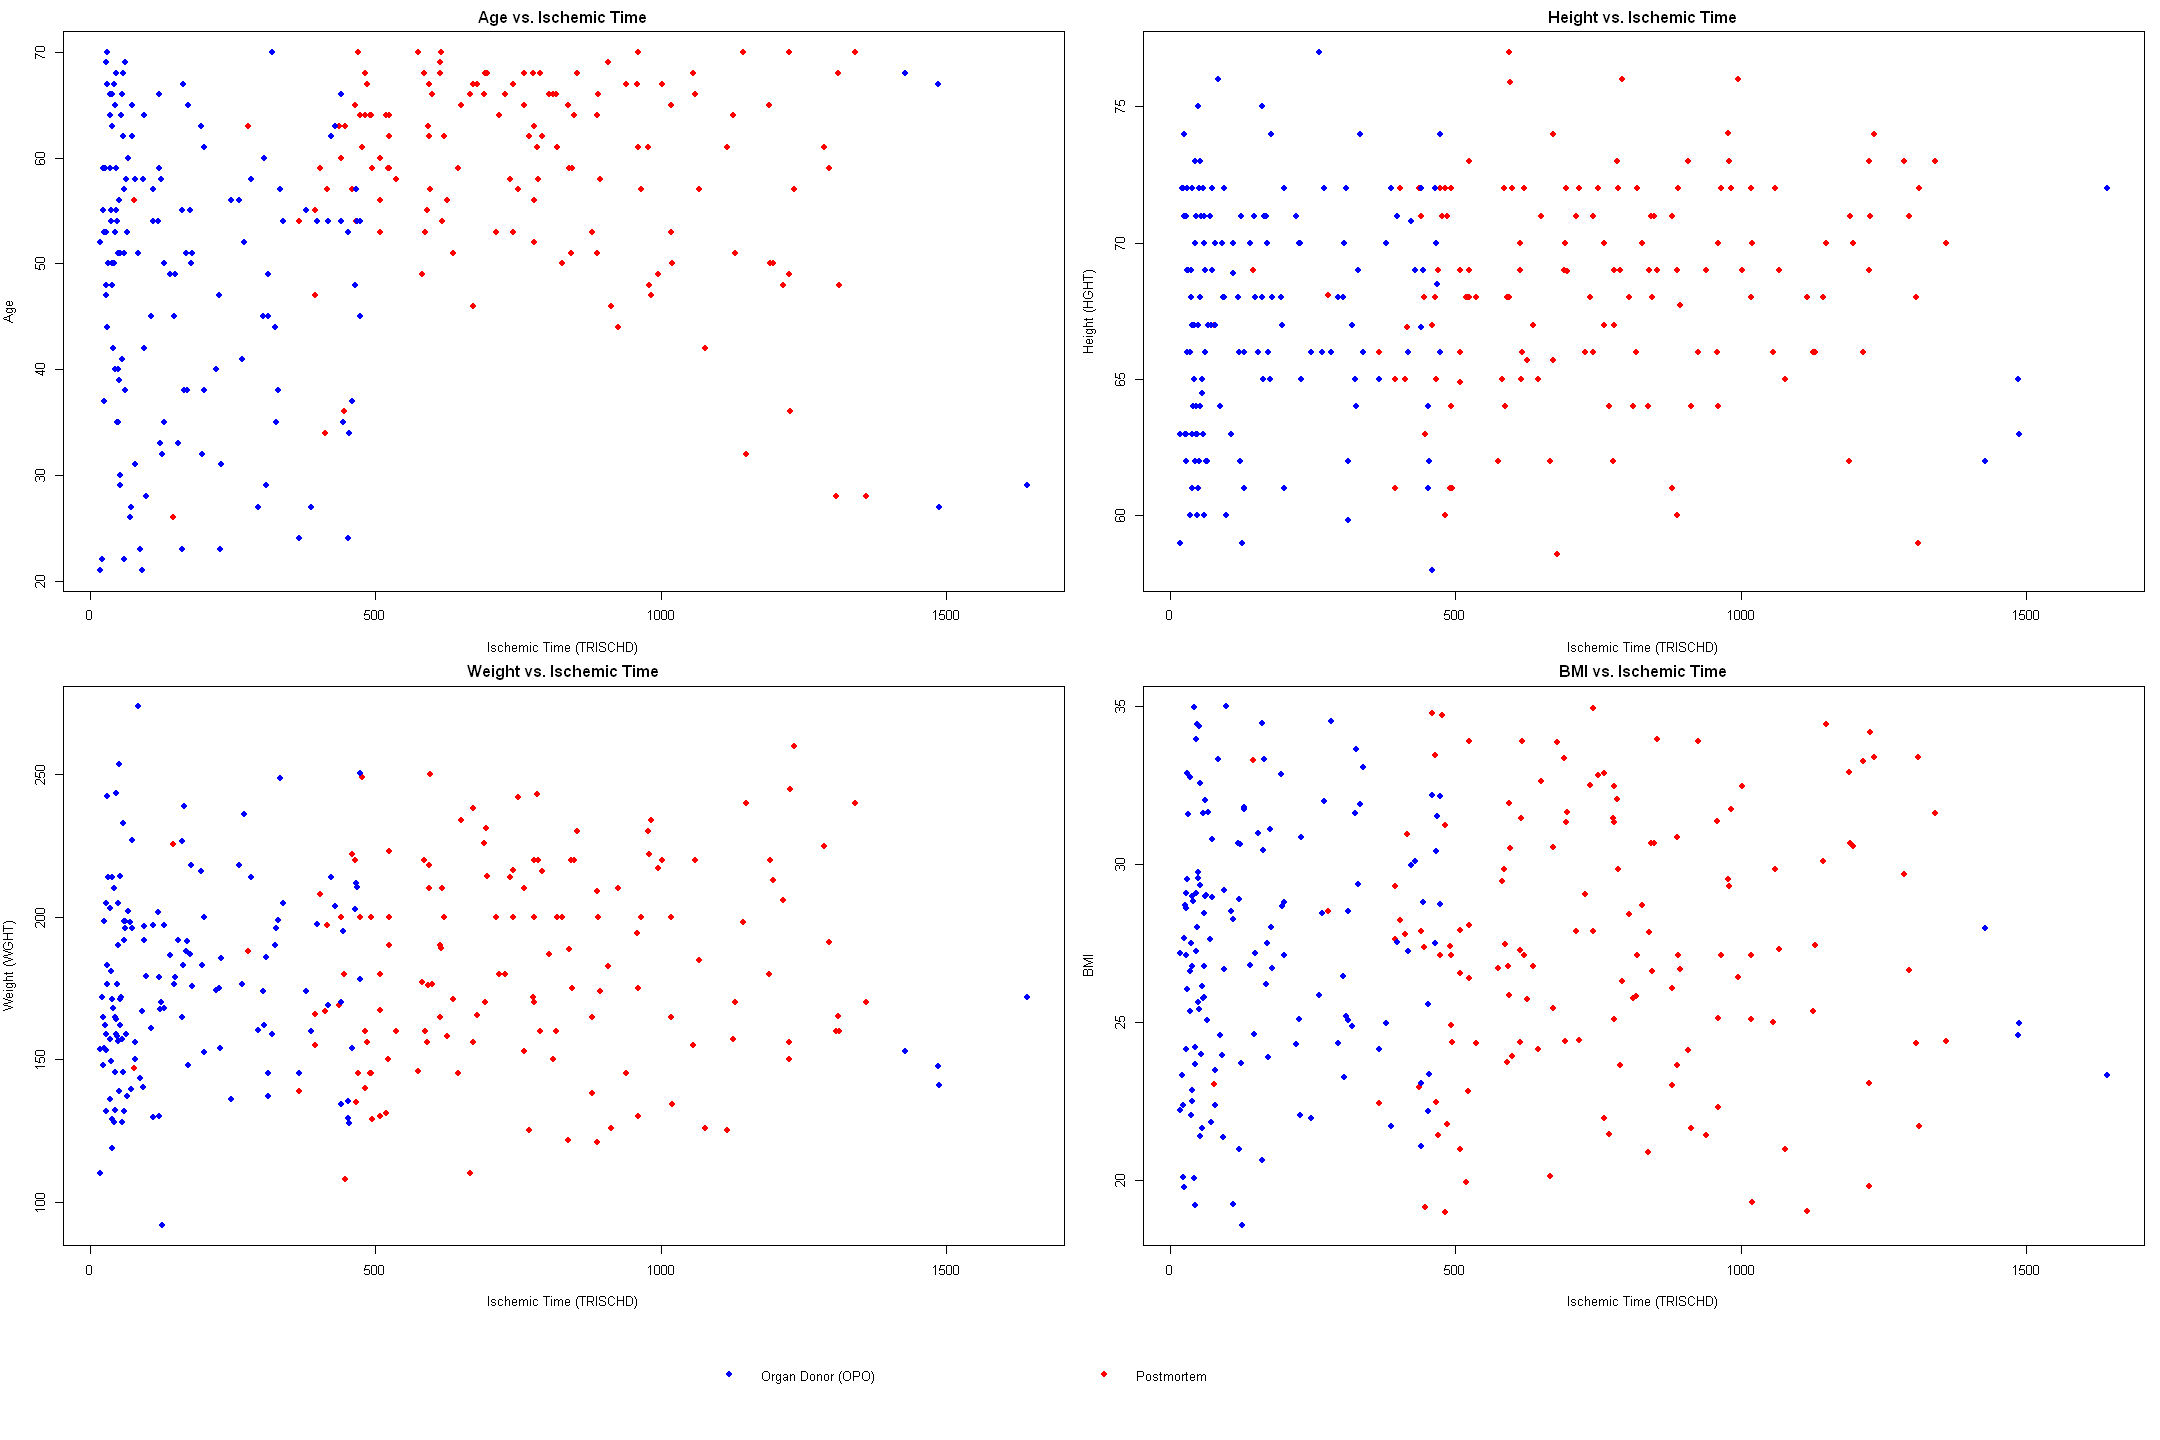

In [63]:
##### CHAT GPT

# Define colors for cohorts
colors <- c("Cohort1" = "blue", "Cohort2" = "red")

# Define layout: 2x2 plots + 1 row for legend
layout(matrix(c(1, 2, 3, 4, 5, 5), nrow = 3, byrow = TRUE), heights = c(1, 1, 0.2))

# Plot 1: AGE vs. TRISCHD
par(mar = c(4, 4, 2, 1))
plot(clinical_data$TRISCHD, clinical_data$AGE, 
     col = colors[clinical_data$COHORT], 
     pch = 16, 
     xlab = "Ischemic Time (TRISCHD)", 
     ylab = "Age", 
     main = "Age vs. Ischemic Time")

# Plot 2: HGHT vs. TRISCHD
par(mar = c(4, 4, 2, 1))
plot(clinical_data$TRISCHD, clinical_data$HGHT, 
     col = colors[clinical_data$COHORT], 
     pch = 16, 
     xlab = "Ischemic Time (TRISCHD)", 
     ylab = "Height (HGHT)", 
     main = "Height vs. Ischemic Time")

# Plot 3: WGHT vs. TRISCHD
par(mar = c(4, 4, 2, 1))
plot(clinical_data$TRISCHD, clinical_data$WGHT, 
     col = colors[clinical_data$COHORT], 
     pch = 16, 
     xlab = "Ischemic Time (TRISCHD)", 
     ylab = "Weight (WGHT)", 
     main = "Weight vs. Ischemic Time")

# Plot 4: BMI vs. TRISCHD
par(mar = c(4, 4, 2, 1))
plot(clinical_data$TRISCHD, clinical_data$BMI, 
     col = colors[clinical_data$COHORT], 
     pch = 16, 
     xlab = "Ischemic Time (TRISCHD)", 
     ylab = "BMI", 
     main = "BMI vs. Ischemic Time")

# Plot 5: Legend
par(mar = c(0, 0, 0, 0))
plot.new()
legend("center", legend = levels(clinical_data$COHORT), col = colors, pch = 16, horiz = TRUE, bty = "n")

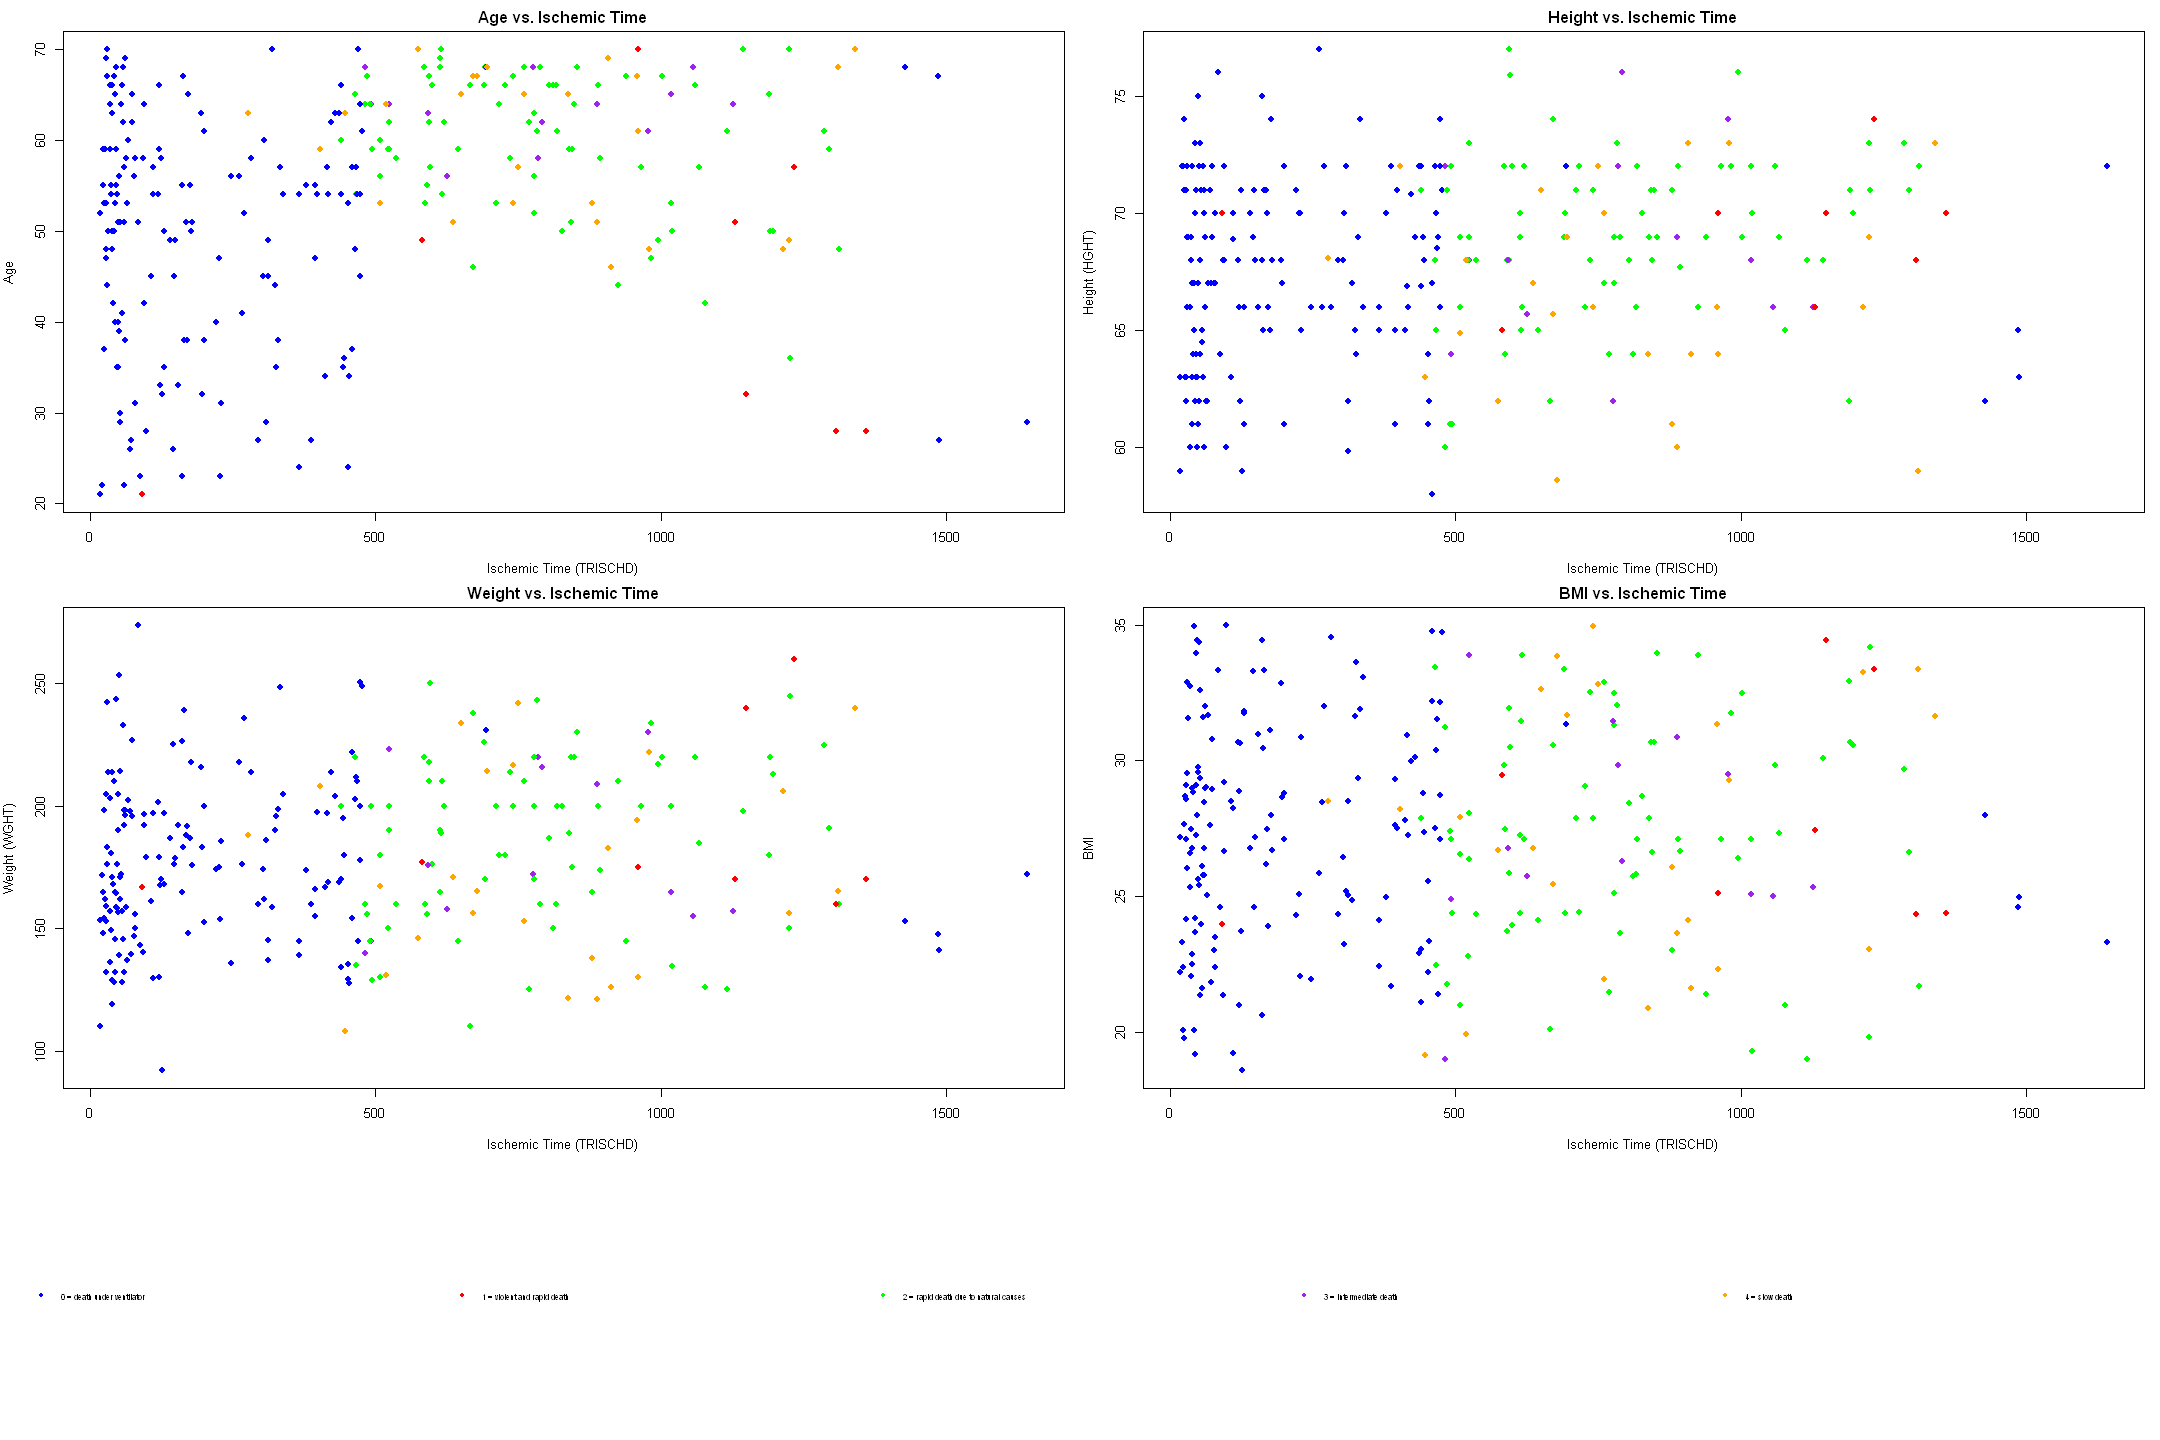

In [70]:
# Define colors for DTHHRDY
colors <- c("0" = "blue", "1" = "red", "2" = "green", "3" = "purple", "4" = "orange")

# Define layout: 2x2 plots + 1 row for legend
layout(matrix(c(1, 2, 3, 4, 5, 5), nrow = 3, byrow = TRUE), heights = c(1, 1, 0.5))

# Plot 1: AGE vs. TRISCHD
par(mar = c(4, 4, 2, 1))
plot(clinical_data$TRISCHD, clinical_data$AGE, 
     col = colors[as.character(clinical_data$DTHHRDY)], 
     pch = 16, 
     xlab = "Ischemic Time (TRISCHD)", 
     ylab = "Age", 
     main = "Age vs. Ischemic Time")

# Plot 2: HGHT vs. TRISCHD
par(mar = c(4, 4, 2, 1))
plot(clinical_data$TRISCHD, clinical_data$HGHT, 
     col = colors[as.character(clinical_data$DTHHRDY)], 
     pch = 16, 
     xlab = "Ischemic Time (TRISCHD)", 
     ylab = "Height (HGHT)", 
     main = "Height vs. Ischemic Time")

# Plot 3: WGHT vs. TRISCHD
par(mar = c(4, 4, 2, 1))
plot(clinical_data$TRISCHD, clinical_data$WGHT, 
     col = colors[as.character(clinical_data$DTHHRDY)], 
     pch = 16, 
     xlab = "Ischemic Time (TRISCHD)", 
     ylab = "Weight (WGHT)", 
     main = "Weight vs. Ischemic Time")

# Plot 4: BMI vs. TRISCHD
par(mar = c(4, 4, 2, 1))
plot(clinical_data$TRISCHD, clinical_data$BMI, 
     col = colors[as.character(clinical_data$DTHHRDY)], 
     pch = 16, 
     xlab = "Ischemic Time (TRISCHD)", 
     ylab = "BMI", 
     main = "BMI vs. Ischemic Time")

# Plot 5: Legend
par(mar = c(0, 0, 0, 0))
plot.new()
legend("center", legend = c("0 = death under ventilator", 
                            "1 = violent and rapid death", 
                            "2 = rapid death due to natural causes", 
                            "3 = intermediate death", 
                            "4 = slow death"), 
       col = colors, pch = 16, horiz = TRUE, bty = "n", cex = 0.6)

In [6]:
install.packages("corrplot")
library("corrplot")


Les packages binaires téléchargés sont dans
	/var/folders/df/d1fmsmr16731rc5wzhnmrp6c0000gn/T//Rtmp9zount/downloaded_packages


corrplot 0.92 loaded



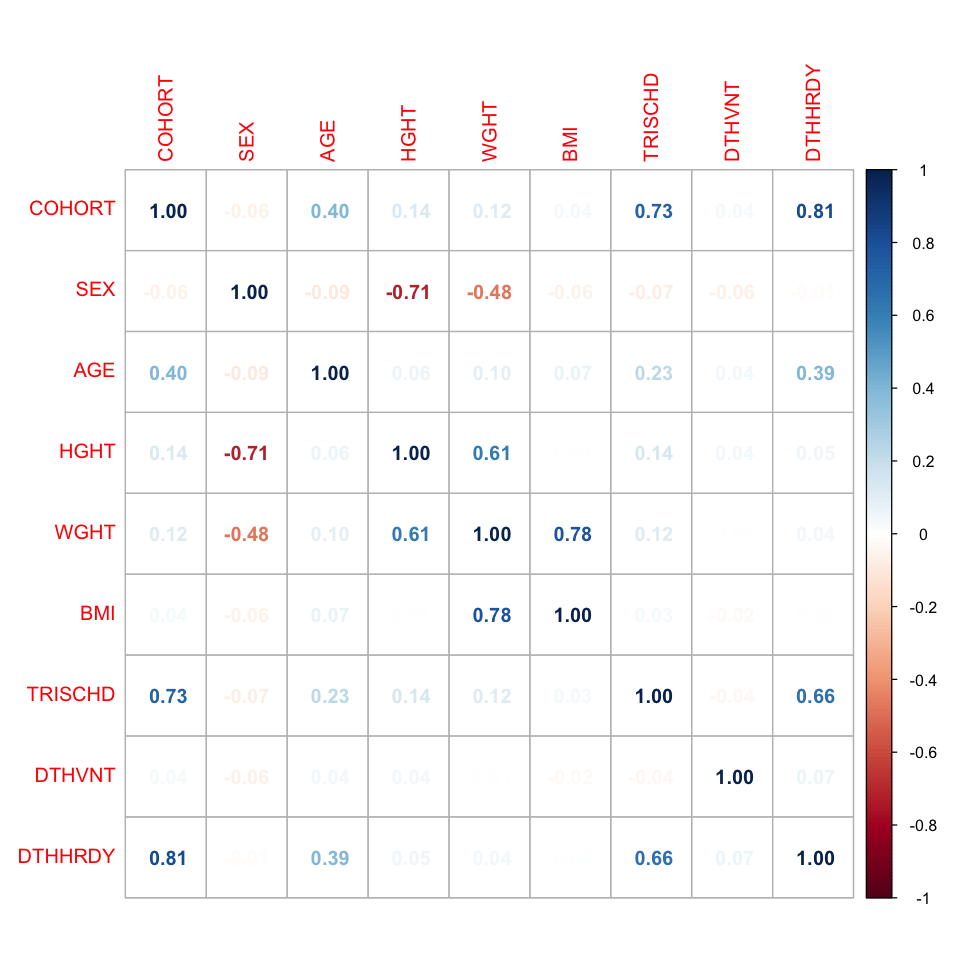

In [7]:
options(repr.plot.width=8, repr.plot.height=8)

COHORT = as.numeric(factor(clinical_data$COHORT))
M = cor(cbind(COHORT,clinical_data[,c(4,5,6,7,8,10,11,12)]))
corrplot(M, method = 'number')

## Question 2. Clinical data vs morphology

In [131]:
# Read the TSV file into a data frame
morphological_counts_init <- read.table("morphological_counts_lunit_dino.tsv", header = TRUE, sep = "\t")

#Give proper names to the rows of the morphological counts matrix
rownames(morphological_counts_init)<-morphological_counts_init$SMPLID

In [133]:
morphological_counts<-t(morphological_counts_init[,-1])
head(morphological_counts)

,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,GTEX.11EM3.0226,GTEX.11EMC.0926,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
Mophological.cluster.G4_0,137,96,2,339,171,2,1,392,40,260,⋯,2,39,0,77,6,32,5,94,460,1
Mophological.cluster.G4_1,88,880,552,1,0,10,239,18,424,235,⋯,286,34,277,271,537,7,18,228,314,308
Mophological.cluster.G4_2,417,236,211,151,36,258,850,14,605,164,⋯,541,634,333,193,208,2,26,79,43,102
Mophological.cluster.G4_3,1,393,1031,637,791,1558,282,10,135,2,⋯,35,109,339,408,72,24,194,83,7,73
Mophological.cluster.G4_4,1,21,174,1844,1011,850,41,316,94,344,⋯,0,46,260,63,3,184,398,158,2,7
Mophological.cluster.G4_5,32,214,216,473,234,48,206,57,58,313,⋯,412,28,248,78,48,200,10,219,246,95


In [187]:
coldata<-as.matrix(clinical_data[,-c(1,2,9,13,14)])
head(coldata)
nrow(coldata)
ncol(morphological_counts)

COHORT,SEX,AGE,HGHT,WGHT,BMI,TRISCHD,DTHVNT,DTHHRDY
Organ Donor (OPO),1,62,72.00,227.0000,30.78,74,1,0
Organ Donor (OPO),2,64,66.00,203.0000,32.76,35,1,0
Postmortem,2,66,66.00,160.0000,25.82,816,0,2
Postmortem,1,64,71.00,220.0000,30.68,848,0,2
Postmortem,1,58,72.00,220.0000,29.83,785,0,3
Organ Donor (OPO),2,66,64.50,128.0000,21.63,56,1,0


[1] 280

[1] 280

In [220]:
median(clinical_data$AGE)
median(clinical_data$HGHT)
median(clinical_data$WGHT)
median(clinical_data$BMI)

[1] 56

[1] 68

[1] 176.37

[1] 27.29

In [308]:
for (variable in colnames(coldata)){
    object<-DESeqDataSetFromMatrix(countData = morphological_counts,
                                   colData = coldata,
                                   design = as.formula(paste("~",variable)))
    assign(paste("dds_",variable,sep=""),DESeq(object))
}

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
 

In [290]:
DEresults<-results(dds_COHORT)
DEresults<-DEresults[order(DEresults$pvalue),]
DEresults

log2 fold change (MLE): COHORT Postmortem vs Organ.Donor..OPO. 
Wald test p-value: COHORT Postmortem vs Organ.Donor..OPO. 
DataFrame with 32 rows and 6 columns
                            baseMean log2FoldChange     lfcSE       stat
                           <numeric>      <numeric> <numeric>  <numeric>
Mophological.cluster.G4_18   143.760        1.93523  0.248751    7.77981
Mophological.cluster.G4_30   137.577        1.03279  0.151631    6.81116
Mophological.cluster.G4_14   250.673        1.56133  0.234254    6.66510
Mophological.cluster.G4_1    303.370       -1.34888  0.232496   -5.80172
Mophological.cluster.G4_4    202.292        1.44716  0.263520    5.49165
...                              ...            ...       ...        ...
Mophological.cluster.G4_11   241.513      0.2024043 0.2299585  0.8801775
Mophological.cluster.G4_8    295.960      0.1868998 0.2325302  0.8037658
Mophological.cluster.G4_19   170.888      0.0648877 0.0922371  0.7034880
Mophological.cluster.G4_16   247.294 

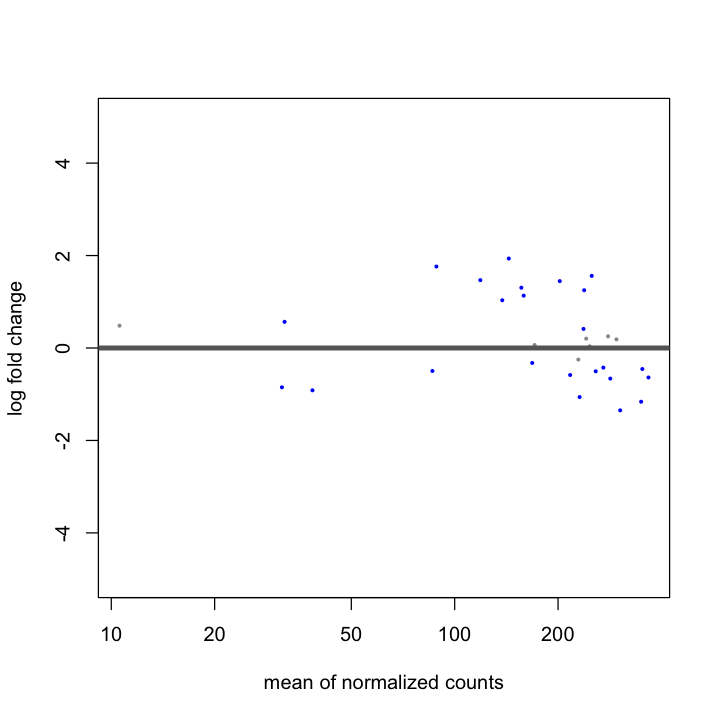

In [291]:
DESeq2::plotMA(object = dds_COHORT, ylim = c(-5, 5))

## Question 3. Morphology vs gene expression

In [125]:
# Read the TSV file into a data frame
RNA_read_counts_init <- read.table("RNA_read_counts.tsv", header = TRUE, sep = "\t")

# Display the first few rows of the data frame to verify it was read correctly
#head(RNA_read_counts)
dim(RNA_read_counts_init)
head(RNA_read_counts_init)

[1] 56200   282

,Name,Description,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000223972.5,DDX11L1,0,0,0,0,0,5,0,0,⋯,1,0,0,3,0,0,0,0,0,1
2,ENSG00000227232.5,WASH7P,78,70,180,78,152,76,132,143,⋯,134,142,140,69,183,61,157,103,57,70
3,ENSG00000278267.1,MIR6859-1,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,1,0,0,0
4,ENSG00000243485.5,MIR1302-2HG,0,0,1,0,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
5,ENSG00000237613.2,FAM138A,1,0,0,1,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
6,ENSG00000268020.3,OR4G4P,1,0,0,1,0,0,2,0,⋯,0,0,0,0,0,0,0,0,0,0


In [129]:
rownames(RNA_read_counts_init)<-RNA_read_counts_init$Name
RNA_read_counts<-as.matrix(RNA_read_counts_init[,-c(1,2)])
head(RNA_read_counts)

,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,GTEX.11EM3.0226,GTEX.11EMC.0926,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
ENSG00000223972.5,0,0,0,0,0,5,0,0,0,0,⋯,1,0,0,3,0,0,0,0,0,1
ENSG00000227232.5,78,70,180,78,152,76,132,143,88,143,⋯,134,142,140,69,183,61,157,103,57,70
ENSG00000278267.1,0,0,0,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,1,0,0,0
ENSG00000243485.5,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
ENSG00000237613.2,1,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
ENSG00000268020.3,1,0,0,1,0,0,2,0,4,1,⋯,0,0,0,0,0,0,0,0,0,0


Let $X=\{x_1,\ldots,x_n\}$ be a sample of a univariate random variable. The _mean absolute deviation_ of $X$ is defined as the median of the absolute deviations from the sample's median, or in symbolic form

\begin{equation*}
\mathrm{MAD}=\mathrm{median}(\{\vert x_i-\mathrm{median}(X)\vert\,\vert\,i=1,\ldots,n\})
\end{equation*}

In [151]:
MAD<-numeric(nrow(RNA_read_counts))
for (i in 1:nrow(RNA_read_counts)){
    MAD[i]<-mad(RNA_read_counts[i,])
}
#Get the indices of the transcripts which are extremely little expressed
rows_to_remove<-which(MAD==0)

In [221]:
summary(MAD)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0      0.0      0.7    393.5     48.9 394697.8 

In [135]:
morphological_counts_init[-1]

,Mophological.cluster.G4_0,Mophological.cluster.G4_1,Mophological.cluster.G4_2,Mophological.cluster.G4_3,Mophological.cluster.G4_4,Mophological.cluster.G4_5,Mophological.cluster.G4_6,Mophological.cluster.G4_7,Mophological.cluster.G4_8,Mophological.cluster.G4_9,⋯,Mophological.cluster.G4_22,Mophological.cluster.G4_23,Mophological.cluster.G4_24,Mophological.cluster.G4_25,Mophological.cluster.G4_26,Mophological.cluster.G4_27,Mophological.cluster.G4_28,Mophological.cluster.G4_29,Mophological.cluster.G4_30,Mophological.cluster.G4_31
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GTEX.111YS.0526,137,88,417,1,1,32,1,1,1,167,⋯,262,233,31,417,80,144,250,664,20,0
GTEX.1122O.1126,96,880,236,393,21,214,1,47,39,291,⋯,3350,99,190,495,278,774,694,268,145,0
GTEX.1128S.0326,2,552,211,1031,174,216,289,0,493,663,⋯,831,135,250,161,82,120,377,2,500,0
GTEX.117XS.0426,339,1,151,637,1844,473,260,3,440,153,⋯,148,166,43,49,158,211,184,142,277,3
GTEX.117YW.0226,171,0,36,791,1011,234,162,0,54,129,⋯,106,68,1,0,76,489,68,281,254,6
GTEX.11DXX.0426,2,10,258,1558,850,48,0,11,2491,325,⋯,8,89,952,0,26,197,323,5,70,0
GTEX.11DXZ.0426,1,239,850,282,41,206,1,370,839,291,⋯,138,342,1459,64,491,38,310,3,46,4
GTEX.11DYG.1226,392,18,14,10,316,57,742,5,232,123,⋯,12,124,129,1,116,254,238,483,185,8
GTEX.11EM3.0226,40,424,605,135,94,58,861,4,11,349,⋯,134,285,637,49,304,143,558,27,542,0


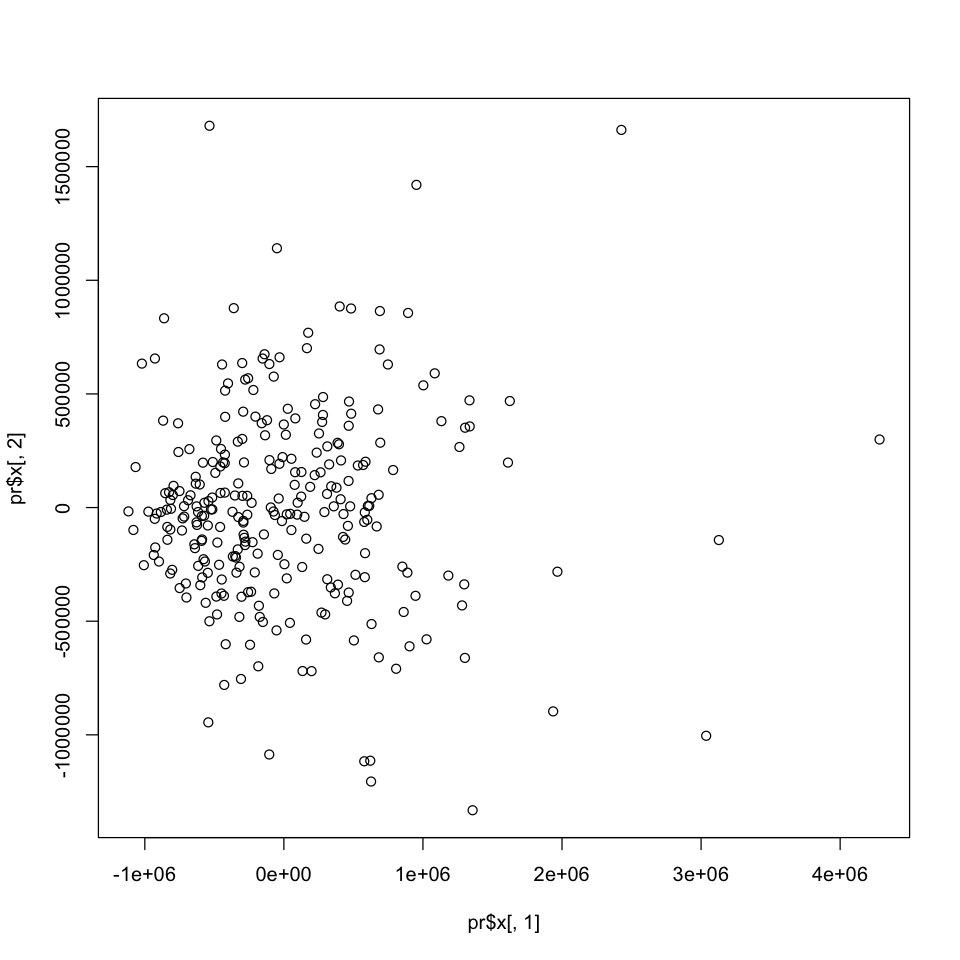

In [130]:
pr = prcomp(t(RNA_read_counts))
plot(pr$x[,1],pr$x[,2])

In [10]:
summary(pr)

Importance of components:
                             PC1       PC2       PC3       PC4       PC5
Standard deviation     7.238e+05 4.303e+05 4.107e+05 2.172e+05 1.806e+05
Proportion of Variance 4.182e-01 1.478e-01 1.346e-01 3.765e-02 2.604e-02
Cumulative Proportion  4.182e-01 5.660e-01 7.006e-01 7.383e-01 7.643e-01
                             PC6       PC7       PC8       PC9      PC10
Standard deviation     1.717e+05 1.547e+05 1.394e+05 1.382e+05 1.288e+05
Proportion of Variance 2.352e-02 1.911e-02 1.552e-02 1.525e-02 1.325e-02
Cumulative Proportion  7.879e-01 8.070e-01 8.225e-01 8.377e-01 8.510e-01
                            PC11      PC12      PC13      PC14      PC15
Standard deviation     1.230e+05 1.141e+05 1.126e+05 1.054e+05 9.733e+04
Proportion of Variance 1.207e-02 1.040e-02 1.012e-02 8.870e-03 7.560e-03
Cumulative Proportion  8.630e-01 8.734e-01 8.836e-01 8.924e-01 9.000e-01
                            PC16      PC17      PC18      PC19      PC20
Standard deviation     9.

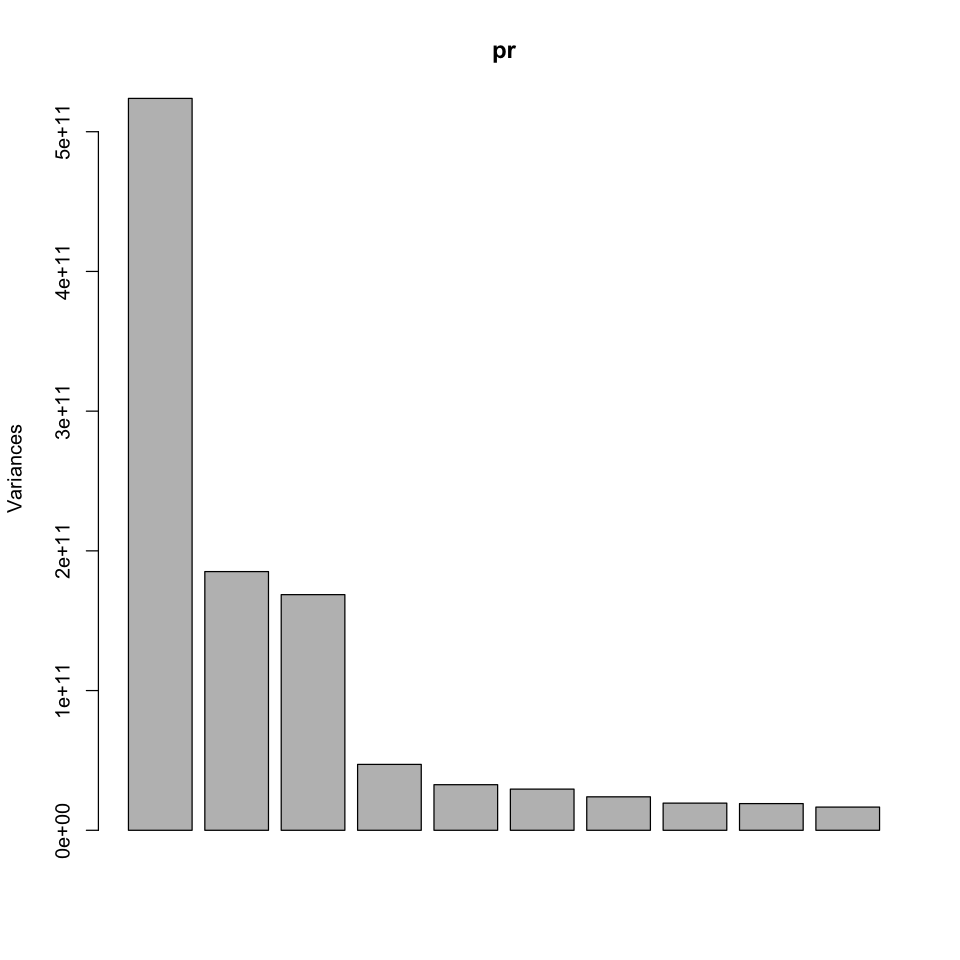

In [11]:
plot(pr)

In [14]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

Bioconductor version '3.18' is out-of-date; the current release version '3.19'
  is available with R version '4.4'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'DESeq2'




Les packages binaires téléchargés sont dans
	/var/folders/df/d1fmsmr16731rc5wzhnmrp6c0000gn/T//Rtmp9zount/downloaded_packages


Old packages: 'BH', 'BiocFileCache', 'BiocManager', 'biomaRt', 'Biostrings',
  'boot', 'brew', 'brio', 'broom', 'broom.helpers', 'BSgenome', 'bslib',
  'cachem', 'callr', 'codetools', 'commonmark', 'curl', 'data.table', 'DBI',
  'dbplyr', 'deldir', 'digest', 'edgeR', 'farver', 'fastmap', 'forecast', 'fs',
  'GenomeInfoDb', 'GenomicAlignments', 'GenomicFeatures', 'ggplot2', 'ggstats',
  'gh', 'glue', 'gtable', 'htmltools', 'httpuv', 'httr2', 'interp',
  'KernSmooth', 'knitr', 'labelled', 'lattice', 'lda', 'locfit', 'matrixStats',
  'mboost', 'mgcv', 'munsell', 'openssl', 'pbdZMQ', 'pixmap', 'pkgbuild',
  'pkgdown', 'pkgload', 'processx', 'promises', 'ps', 'R.oo', 'ragg', 'Rcpp',
  'RcppArmadillo', 'RcppEigen', 'RCurl', 'readr', 'remotes', 'repr', 'Rhtslib',
  'rlang', 'rmarkdown', 'roxygen2', 'RSQLite', 'rstudioapi', 'Rsubread',
  'rvest', 'S4Arrays', 'sass', 'segmented', 'shiny', 'sm', 'sp', 'SparseArray',
  'stringi', 'survival', 'systemfonts', 'testthat', 'tidyr', 'tidyselect',
  'ti

In [16]:
library(DESeq2)

Warning message:
“le package ‘DESeq2’ a été compilé avec la version R 4.3.3”
Le chargement a nécessité le package : S4Vectors

Warning message:
“le package ‘S4Vectors’ a été compilé avec la version R 4.3.2”
Le chargement a nécessité le package : stats4

Le chargement a nécessité le package : BiocGenerics


Attachement du package : ‘BiocGenerics’


Les objets suivants sont masqués depuis ‘package:stats’:

    IQR, mad, sd, var, xtabs


Les objets suivants sont masqués depuis ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attachement du package : ‘S4Vectors’


L'objet suivant est masqué depuis ‘package:utils’:

    findMat

In [222]:
install.packages("pheatmap")
library(pheatmap)
pheatmap(RNA_read_counts, scale = 'row', show_rownames = FALSE)


Les packages binaires téléchargés sont dans
	/var/folders/df/d1fmsmr16731rc5wzhnmrp6c0000gn/T//Rtmp9zount/downloaded_packages


## The theory behind DESeq2